In [26]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
data = pd.read_csv('./experiments/data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [28]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target and position features (Long/Lat). Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target values.

In [29]:
data.dropna(subset=['Price', 'Longtitude', 'Lattitude'], axis=0, inplace=True)
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988,Yarraville,78 Bayview Rd,3,h,1101000.0,6.3,3.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
20989,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
20990,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
20991,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [30]:
geo_features = ['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

In [31]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].mean())

/tmp/ipykernel_11899/1710556712.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f] = data[f].fillna(method='ffill')


In [32]:
data.isna().sum(axis=0)

Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Regionname       0
Propertycount    0
dtype: int64

## Data preprocessing

For feature "YearBuilt" - apply segmentation into bins

In [33]:
# data['YearBuilt'] = pd.cut(data['YearBuilt'], bins=20, labels=range(20))

(array([1.4109e+04, 5.8390e+03, 8.2400e+02, 1.5400e+02, 4.8000e+01,
        1.4000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

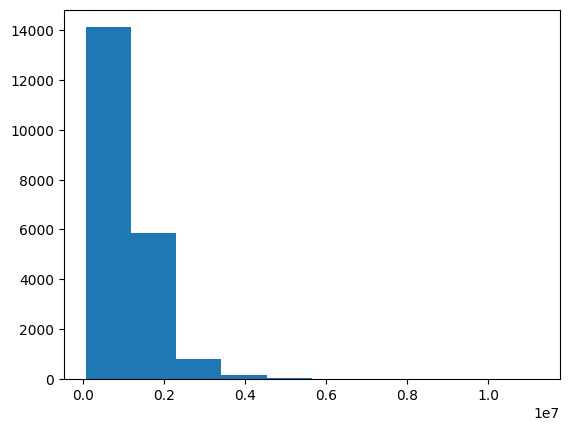

In [34]:
import matplotlib.pyplot as plt

plt.hist(data['Price'])

In [35]:
data['Price'].skew()

2.472900878148523

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range (including other numerical features).

(array([ 568., 4587., 5441., 3258., 2388., 1338.,  695.,  454.,  236.,
         165.]),
 array([  85000.,  380500.,  676000.,  971500., 1267000., 1562500.,
        1858000., 2153500., 2449000., 2744500., 3040000.]),
 <BarContainer object of 10 artists>)

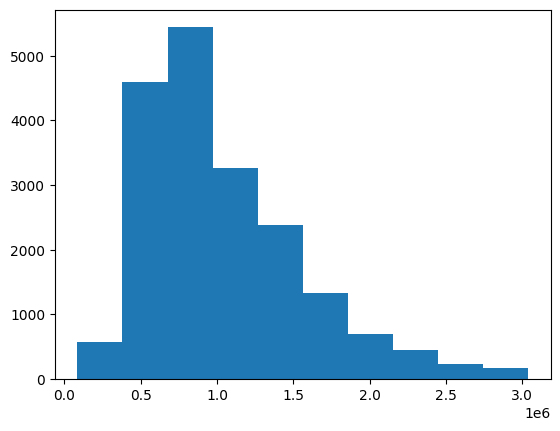

In [36]:
from scipy import stats

num_data = data[num_feat]
data = data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]
plt.hist(data['Price'])

(array([1.000e+00, 6.000e+00, 2.800e+01, 3.520e+02, 1.659e+03, 4.169e+03,
        5.239e+03, 4.313e+03, 2.482e+03, 8.810e+02]),
 array([11.35040654, 11.70810269, 12.06579884, 12.423495  , 12.78119115,
        13.1388873 , 13.49658346, 13.85427961, 14.21197577, 14.56967192,
        14.92736807]),
 <BarContainer object of 10 artists>)

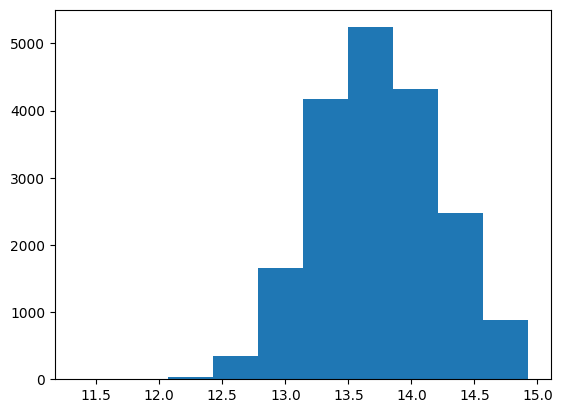

In [37]:
plt.hist(np.log(data['Price']))

In [38]:
data['Price'].skew()

1.1450896464233793

In [39]:
target_log = np.log(target)

NameError: name 'target' is not defined

In [ ]:
position_data

,Lattitude,Longtitude,CouncilArea,Address,Suburb
0,-37.79960,144.99840,Yarra City Council,85 Turner St,Abbotsford
1,-37.80790,144.99340,Yarra City Council,25 Bloomburg St,Abbotsford
2,-37.80930,144.99440,Yarra City Council,5 Charles St,Abbotsford
3,-37.79690,144.99690,Yarra City Council,40 Federation La,Abbotsford
4,-37.80720,144.99410,Yarra City Council,55a Park St,Abbotsford
...,...,...,...,...,...
20988,-37.81095,144.88516,Maribyrnong City Council,78 Bayview Rd,Yarraville
20989,-37.81053,144.88467,Maribyrnong City Council,13 Burns St,Yarraville
20990,-37.81551,144.88826,Maribyrnong City Council,29A Murray St,Yarraville
20991,-37.82286,144.87856,Maribyrnong City Council,147A Severn St,Yarraville


In [ ]:
print(geo_features)
position_data = position_data.iloc[data.index].reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']


Standardize numerical features

In [ ]:
target = data['Price']
data.drop('Price', axis=1, inplace=True)
num_feat.remove('Price')
std_scaler = StandardScaler()

data[num_feat] = std_scaler.fit_transform(data[num_feat])

data

,Rooms,Type,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,-1.126156,h,-1.393692,-1.124637,-0.881470,-0.761005,-0.613238,0.105547,-0.018706,Northern Metropolitan,-0.813892
1,-1.126156,h,-1.393692,-1.124637,-0.881470,-1.957372,-0.705959,-1.267642,-2.537149,Northern Metropolitan,-0.813892
2,0.005204,h,-1.393692,0.016468,0.743351,-1.957372,-0.750304,-0.015475,-2.537149,Northern Metropolitan,-0.813892
3,0.005204,h,-1.393692,0.016468,0.743351,-0.761005,-0.830932,0.105547,-0.018706,Northern Metropolitan,-0.813892
4,1.136565,h,-1.393692,0.016468,-0.881470,0.435361,-0.778524,-0.156565,1.774218,Northern Metropolitan,-0.813892
...,...,...,...,...,...,...,...,...,...,...,...
19125,0.005204,h,-0.767435,0.016468,-0.881470,0.094707,-0.439888,0.105547,-0.018706,Western Metropolitan,-0.153060
19126,1.136565,h,-0.767435,1.157573,-0.881470,1.631728,0.174896,0.105547,-0.018706,Western Metropolitan,-0.153060
19127,-1.126156,h,-0.767435,-1.124637,0.743351,-0.761005,-0.822869,-0.826738,1.925494,Western Metropolitan,-0.153060
19128,-1.126156,t,-0.767435,-1.124637,-0.881470,0.435361,-0.576955,-0.544560,1.244752,Western Metropolitan,-0.153060


One-hot encoding is applied to categorical features "Regionname" and "Type"

In [ ]:
ohe = OneHotEncoder()

encoded_cat = ohe.fit_transform(data[cat_feat])
encoded_cat = pd.DataFrame(encoded_cat.todense())
data.drop(cat_feat, axis=1, inplace=True)

data = pd.concat([data, encoded_cat], axis=1)

In [ ]:
print(data.shape)
data

(19130, 20)


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-1.126156,-1.393692,-1.124637,-0.881470,-0.761005,-0.613238,0.105547,-0.018706,-0.813892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.126156,-1.393692,-1.124637,-0.881470,-1.957372,-0.705959,-1.267642,-2.537149,-0.813892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.005204,-1.393692,0.016468,0.743351,-1.957372,-0.750304,-0.015475,-2.537149,-0.813892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.005204,-1.393692,0.016468,0.743351,-0.761005,-0.830932,0.105547,-0.018706,-0.813892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.136565,-1.393692,0.016468,-0.881470,0.435361,-0.778524,-0.156565,1.774218,-0.813892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,0.005204,-0.767435,0.016468,-0.881470,0.094707,-0.439888,0.105547,-0.018706,-0.153060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19126,1.136565,-0.767435,1.157573,-0.881470,1.631728,0.174896,0.105547,-0.018706,-0.153060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19127,-1.126156,-0.767435,-1.124637,0.743351,-0.761005,-0.822869,-0.826738,1.925494,-0.153060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19128,-1.126156,-0.767435,-1.124637,-0.881470,0.435361,-0.576955,-0.544560,1.244752,-0.153060,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Building edge index

In [ ]:
from sklearn.neighbors import NearestNeighbors

Generate edge index for our graph of real estate.<br>
Creates edge between two entities, if distance between them is under the predefined threshold

In [ ]:
import os
import pickle
from experiments.graph_encoder import encode_edges

edge_index_file = "experiments/edge_index.pickle"
EDGE_CREATING_DISTANCE = 1

if os.path.exists(edge_index_file):
    with open(edge_index_file, 'rb') as f:
        edge_index = pickle.load(f)
else:
    edge_index = encode_edges(position_data, EDGE_CREATING_DISTANCE)
    
    with open(edge_index_file, "wb") as output:
        pickle.dump(edge_index, output)

In [ ]:
edge_index.shape

torch.Size([2, 1665312])

Create DataLoader which devides nodes into set of batches (for learning).<br>
Also, creates custom data-splitter for dividing data into train/val/test parts.

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomNodeSplit

data = Data(
    torch.tensor(data.to_numpy(), dtype=torch.float32),
    edge_index=edge_index,
    # y=torch.tensor(target.to_numpy(), dtype=torch.float32)
    y=torch.tensor(target_log, dtype=torch.float32)
)
node_splitter = RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = node_splitter(data)

data_loader = NeighborLoader(graph,
                             input_nodes=graph.train_mask,
                             batch_size=128,
                             num_neighbors=[30, 10], 
                             shuffle=True,)

## Applying GNN

In [ ]:
import torch
import torch.nn as nn
import torch_geometric.nn as nn_geom
from torch_geometric.data import Data

class Net(nn.Module):
    def __init__(self, input_size: int, hidden_layer: int):
        super().__init__()
        self.conv1 = nn_geom.SAGEConv(input_size, hidden_layer)
        self.conv2 = nn_geom.SAGEConv(hidden_layer, hidden_layer)
        
        self.linear1 = nn.Linear(hidden_layer, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, hidden_layer)
        self.linear3 = nn.Linear(hidden_layer, 1)

    
    def forward(self, data: Data, edge_index: torch.Tensor) -> torch.Tensor:
        # x = self.dropout(self.conv1(data, edge_index).relu())
        # x = self.dropout(self.conv2(x, edge_index).relu())

        x = self.conv1(data, edge_index).relu()
        x = self.conv2(x, edge_index).relu()

        x = self.linear1(x).relu()
        x = self.linear2(x).relu()
        
        return self.linear3(x)

In [ ]:
model = Net(graph.x.shape[1], 16)

loss_criteria = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model

Net(
  (conv1): SAGEConv(20, 16, aggr=mean)
  (conv2): SAGEConv(16, 16, aggr=mean)
  (linear1): Linear(in_features=16, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
)

In [ ]:
import math
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

n_epochs = 50
best_mse, best_weights = math.inf, None

for epoch in range(n_epochs):
    model.train()
    for batch in data_loader:
        optim.zero_grad()
        out = model(batch.x, batch.edge_index)

        y = batch.y[:batch.batch_size]
        out = out[:batch.batch_size]

        loss = loss_criteria(out, y)
        loss.backward()
        optim.step()
    
    model.eval()
    predicts = model(graph.x, graph.edge_index).detach()
    mse = loss_criteria(predicts[graph.val_mask], graph.y[graph.val_mask].detach())
    r2 = r2_score(graph.y[graph.val_mask].detach(), predicts[graph.val_mask].detach())
    
    print(f'Epoch #{epoch} | MSE_Loss = {mse:.4e} | R^2 = {r2}')
    
    if mse < best_mse:
        best_mse, best_weights = mse, model.state_dict()

Epoch #0 | MSE_Loss = 4.4596e-01 | R^2 = -0.5913781978824779
Epoch #1 | MSE_Loss = 4.4914e-01 | R^2 = -0.7717650396457516
Epoch #2 | MSE_Loss = 4.1164e-01 | R^2 = -0.3955417469989637
Epoch #3 | MSE_Loss = 4.8733e-01 | R^2 = -0.902604795735827
Epoch #4 | MSE_Loss = 4.5515e-01 | R^2 = -0.6947847371811033
Epoch #5 | MSE_Loss = 4.0711e-01 | R^2 = -0.31884191312892307
Epoch #6 | MSE_Loss = 4.3464e-01 | R^2 = -0.4590619151524802
Epoch #7 | MSE_Loss = 4.1302e-01 | R^2 = -0.37250517447064
Epoch #8 | MSE_Loss = 4.0806e-01 | R^2 = -0.2690704602100973
Epoch #9 | MSE_Loss = 4.0864e-01 | R^2 = -0.38897525496672136
Epoch #10 | MSE_Loss = 4.1218e-01 | R^2 = -0.25081777317621756
Epoch #11 | MSE_Loss = 4.7329e-01 | R^2 = -0.6043741243309799
Epoch #12 | MSE_Loss = 4.3706e-01 | R^2 = -0.5262452957943844
Epoch #13 | MSE_Loss = 4.3177e-01 | R^2 = -0.4933695895668875
Epoch #14 | MSE_Loss = 5.2292e-01 | R^2 = -0.9280581926765956
Epoch #15 | MSE_Loss = 4.8838e-01 | R^2 = -0.6075499897788463
Epoch #16 | MSE_Lo

KeyboardInterrupt: 

In [ ]:
model.conv1.lin

Linear(20, 128, bias=False)

In [ ]:

model.load_state_dict(best_weights)

model.eval()
predicts = model(graph.x, graph.edge_index)
mse = loss_criteria(predicts[graph.test_mask], graph.y[graph.test_mask])
r2 = r2_score(graph.y[graph.test_mask].detach(), predicts[graph.test_mask].detach())

print(f'GNN : MSE_Loss = {mse:.4e} | R^2 = {r2}')

GNN : MSE_Loss = 2.6742e+11 | R^2 = 0.025434862380812828
